In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import pandas as pd
import re
# from dotenv import load_dotenv
import yfinance as yf
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
def decontracted(phrase):
   # specific
   phrase = re.sub(r"won't", "will not", phrase)
   phrase = re.sub(r"can\'t", "can not", phrase)
   
   # general
   phrase = re.sub(r"n\'t", " not", phrase)
   phrase = re.sub(r"\'re", " are", phrase)
   phrase = re.sub(r"\'s", " is", phrase)
   phrase = re.sub(r"\'d", " would", phrase)
   phrase = re.sub(r"\'ll", " will", phrase)
   phrase = re.sub(r"\'t", " not", phrase)
   phrase = re.sub(r"\'ve", " have", phrase)
   phrase = re.sub(r"\'m", " am", phrase)
   return phrase
 
def clean(text):
   text = str(text)
   text = text.lower()
   text = re.sub(r'http\S+', ' ', text)
   text = re.sub(r'pic.twitter\S+', ' ', text)
   text = decontracted(text)
   text = re.sub(r'\(([^)]+)\)', " ", text)
   text = text.replace('etmarkets', '').replace('marketupdates', '').replace('newsalert', '').replace('ndtv', '').replace('moneycontrol', '').replace('here is why', '')
   text = text.replace('marketsupdate', '').replace('biznews', '').replace('click here', '').replace('live updates', '').replace('et now', '')
   text = re.sub(r'[^a-zA-Z ]+', ' ', text)
   text = re.sub(r' \w{1,2}_', ' ', text)
   text = re.sub('\s+',' ', text)
   return text
   
def clean_dates(df_n):
    df_n['date'] = pd.to_datetime(df_n['date'], format="%Y-%m-%d")
    df_n['date'] = df_n.apply(lambda row : str(row['date']).split()[0], axis=1)

def clean_text(df_n):
    p = decontracted(df_n['text'])
    return clean(p)

In [ ]:

# def sentiment_scores(sentence):

#     sid_obj = SentimentIntensityAnalyzer()

#     sentiment_dict = sid_obj.polarity_scores(sentence)

#     if sentiment_dict['compound'] >= 0 :
#         return 1
 
#     elif sentiment_dict['compound'] <  0 :
#         return -1

 

In [3]:
start_date = '2015-01-01'
end_date = '2021-12-29'
max_results = 5000
user_from = 'NDTVProfit'

In [4]:
stocks_df = yf.download(tickers="%5Ensei", start=start_date, end=end_date, interval="1d").reset_index()  # yyyy-mm-dd
# stocks_df = pd.read_csv('data.csv')
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,8395.450195,101900
1,2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,8378.400391,118200
2,2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,8127.350098,172800
3,2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,8102.100098,164100
4,2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,8234.599609,143800
...,...,...,...,...,...,...,...
1711,2021-12-22,16865.550781,16971.000000,16819.500000,16955.449219,16955.449219,207900
1712,2021-12-23,17066.800781,17118.650391,17015.550781,17072.599609,17072.599609,197000
1713,2021-12-24,17149.500000,17155.599609,16909.599609,17003.750000,17003.750000,182600
1714,2021-12-27,16937.750000,17112.050781,16833.199219,17086.250000,17086.250000,144800


In [5]:
stocks_df = stocks_df[['Date', 'Close']]
stocks_df.columns = ['date', 'prices']

# stocks_df['date'] = stocks_df.apply(lambda row : str(row['date']).split()[0], axis=1)
stocks_df

,date,prices
0,2015-01-02,8395.450195
1,2015-01-05,8378.400391
2,2015-01-06,8127.350098
3,2015-01-07,8102.100098
4,2015-01-08,8234.599609
...,...,...
1711,2021-12-22,16955.449219
1712,2021-12-23,17072.599609
1713,2021-12-24,17003.750000
1714,2021-12-27,17086.250000


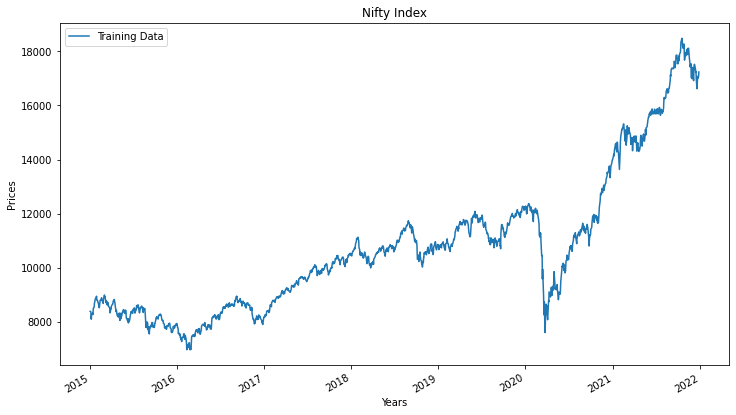

In [6]:
plt.figure (figsize=(12,7))
plt.title('Nifty Index')
plt.xlabel('Years')
plt.ylabel('Prices')

ax = plt.gca()

formatter = mdates.DateFormatter("%Y")
ax.xaxis.set_major_formatter(formatter)

locator = mdates.YearLocator()
ax.xaxis.set_major_locator(locator)

plt.plot(stocks_df['date'],stocks_df['prices'], label='Training Data')

plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


In [ ]:
# train_data, test_data = stocks_df[0:int(len(stocks_df)*0.8)], stocks_df[int(len(stocks_df)*0.8):]
# train_data = train_data.set_index('date', drop= False)
# test_data = test_data.set_index ('date', drop= False)
# plt.figure (figsize=(12,7))
# plt.title('Nifty Index')
# plt.xlabel('Years')
# plt.ylabel('Prices')

# ax = plt.gca()

# formatter = mdates.DateFormatter("%Y")
# ax.xaxis.set_major_formatter(formatter)

# locator = mdates.DayLocator()
# ax.xaxis.set_major_locator(locator)


# plt.plot(train_data['prices'],
# 'blue'
# , label='Training Data')
# plt.plot(test_data['prices'],
# 'red', label='Testing Data')
# plt.legend()
# plt.gcf().autofmt_xdate()
# plt.show()

In [ ]:
os.system(f"snscrape --jsonl --max-results {max_results} --since {start_date} twitter-search \
\"from:{user_from} until:{end_date}\" > {user_from}.json")

In [7]:
tweets_df = pd.read_json(f'{user_from}.json', lines=True)
tweets_df = tweets_df[['date', 'renderedContent']]
tweets_df.columns = ['date', 'text']
# tweets_df['index'] = tweets_df.index
tweets_df

,date,text
0,2021-12-28 17:39:30+00:00,@jagograhakjago has notified new direct sellin...
1,2021-12-28 15:19:27+00:00,#Sebi has decided to tighten norms for IPOs in...
2,2021-12-28 13:47:11+00:00,#Sebi has decided that unit holders' consent w...
3,2021-12-28 12:47:47+00:00,@RBI has called for tightening of banks' risk ...
4,2021-12-28 10:35:04+00:00,"Sensex Rallies 477 Points, Nifty Ends Above 17..."
...,...,...
72820,2015-01-01 03:46:36+00:00,"Markets open lower: Sensex down 0.30% to 27,41..."
72821,2015-01-01 03:35:28+00:00,Oil ends on a low after halving in 2014 as OPE...
72822,2015-01-01 03:31:39+00:00,Rupee opens lower at 63.17 per dollar against ...
72823,2015-01-01 03:00:44+00:00,"Glenmark, LIC Housing Finance, NBCC in focus t..."


In [8]:
# CLEAN DATES AND TEXT OF TWEETS

tweets_df['text']  = tweets_df.apply(clean_text, axis=1)
clean_dates(tweets_df)
tweets_df['date'] = pd.to_datetime(tweets_df['date'])
tweets_df

,date,text
0,2021-12-28,jagograhakjago has notified new direct sellin...
1,2021-12-28,sebi has decided to tighten norms for ipos in...
2,2021-12-28,sebi has decided that unit holders consent wi...
3,2021-12-28,rbi has called for tightening of banks risk m...
4,2021-12-28,sensex rallies points nifty ends above on glob...
...,...,...
72820,2015-01-01,markets open lower sensex down to nifty slips to
72821,2015-01-01,oil ends on a low after halving in as opec sta...
72822,2015-01-01,rupee opens lower at per dollar against wednes...
72823,2015-01-01,glenmark lic housing finance nbcc in focus tod...


In [14]:
tweets = tweets_df.copy()

In [47]:
def fil(data):
    if data:
        return data[10]
    else:
        return data

In [15]:
tweets.groupby('date')['text'].apply('#'.join).iloc[0]

'central bank allots shares to lic to raise over rs crore profit com news market ar #wipro seeks members nod to reduce share capital profit com news corporate #excise duty on petrol diesel hiked by rs litre profit com news commoditi #government hikes excise duty on petrol and diesel by rs a litre press trust of india#sebi to revitalise primary market with e ipo in new year profit com news ipo artic #auto companies in wait and watch mode on prices profit com news industrie #tvs motor sales up in december profit com news corporate #pm modi is meet with psu bankers good for industry sbi profit com news economy a #fii inflows hit record billion in debt markets in profit com news market ar #hero motocorp sales rise marginally in december profit com news corporate #expect returns annually over years sundaram mf profit com news market ar #mahindra amp mahindra sales down in december profit com news corporate #sensex starts on a positive note ends points higher at #meeting fiscal deficit targe

In [10]:
tweets_senti = tweets_df

In [13]:
# from tqdm.notebook import tqdm_notebook
new_words = {'falls': -9, 'drops': -9, 'rise': 9, 'increases': 9, 'gain': 9, 'hiked': -9, 'dips': -9, 'declines': -9,
'decline': -9, 'hikes': -9, 'jumps': 9, 'lose': -9, 'profit': 9, 'loss': -9, 'shreds': -9, 'sell': -9, 'buy': 9, 'recession': -9,
'rupee weakens': -9, 'record low': -9, 'record high': 9, 'sensex up': 9, 'nifty down': -9, 'sensex down': -9, 'nifty up': 9}

analyser = SentimentIntensityAnalyzer()
analyser.lexicon.update(new_words)

for i in (tweets_senti.itertuples()):
    score = analyser.polarity_scores(tweets_senti.iloc[i[0]]['text'])
    tweets_senti.at[i[0], 'score'] = score['compound']
    if score['compound'] >= 0:
        tweets_senti.at[i[0], 'sentiment'] = 1
    else:
       tweets_senti.at[i[0], 'sentiment'] = -1

tweets_senti.tail()

,date,text,score,sentiment
72820,2015-01-01,markets open lower sensex down to nifty slips to,0.1280,1.0
72821,2015-01-01,oil ends on a low after halving in as opec sta...,0.8979,1.0
72822,2015-01-01,rupee opens lower at per dollar against wednes...,-0.2960,-1.0
72823,2015-01-01,glenmark lic housing finance nbcc in focus tod...,0.8750,1.0
72824,2015-01-01,us stocks post sixth straight year of gains pr...,0.9460,1.0


In [ ]:
# # GROUPBY THE DATE AND CONCATINATE TWEET TEXT
# tweets_df['text'] = tweets_df.groupby('date')['text'].transform(' '.join)
# tweets_df

In [14]:
# GROUPBY THE DATE AND CONCATINATE TWEET TEXT
tweets_senti['senti'] = tweets_senti.groupby('date')['score'].transform(np.average)
tweets_senti

,date,text,score,sentiment,senti
0,2021-12-28,jagograhakjago has notified new direct sellin...,0.5574,1.0,0.272183
1,2021-12-28,sebi has decided to tighten norms for ipos in...,0.0000,1.0,0.272183
2,2021-12-28,sebi has decided that unit holders consent wi...,0.2960,1.0,0.272183
3,2021-12-28,rbi has called for tightening of banks risk m...,-0.2023,-1.0,0.272183
4,2021-12-28,sensex rallies points nifty ends above on glob...,0.5994,1.0,0.272183
...,...,...,...,...,...
72820,2015-01-01,markets open lower sensex down to nifty slips to,0.1280,1.0,0.709969
72821,2015-01-01,oil ends on a low after halving in as opec sta...,0.8979,1.0,0.709969
72822,2015-01-01,rupee opens lower at per dollar against wednes...,-0.2960,-1.0,0.709969
72823,2015-01-01,glenmark lic housing finance nbcc in focus tod...,0.8750,1.0,0.709969


In [15]:
tweets_df = tweets_df[['date', 'senti']]
tweets_df.drop_duplicates(inplace=True)
tweets_df.reset_index(inplace=True)
tweets_df

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,index,date,senti
0,0,2021-12-28,0.272183
1,12,2021-12-27,0.296000
2,13,2021-12-25,0.226933
3,16,2021-12-24,0.074000
4,24,2021-12-23,0.118400
...,...,...,...
2478,72641,2015-01-05,0.679431
2479,72693,2015-01-04,0.924806
2480,72709,2015-01-03,0.579631
2481,72744,2015-01-02,0.698253


Text(0, 0.5, 'Sentiment Scores')

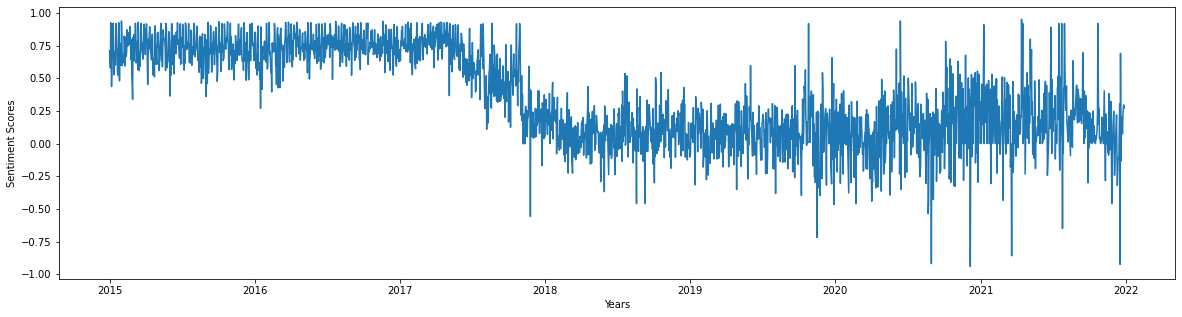

In [16]:

plt.figure(figsize=(20, 5))
plt.plot(tweets_df['date'], tweets_df['senti'])
plt.xlabel('Years')
plt.ylabel('Sentiment Scores')

Text(0, 0.5, 'Sentiment Scores')

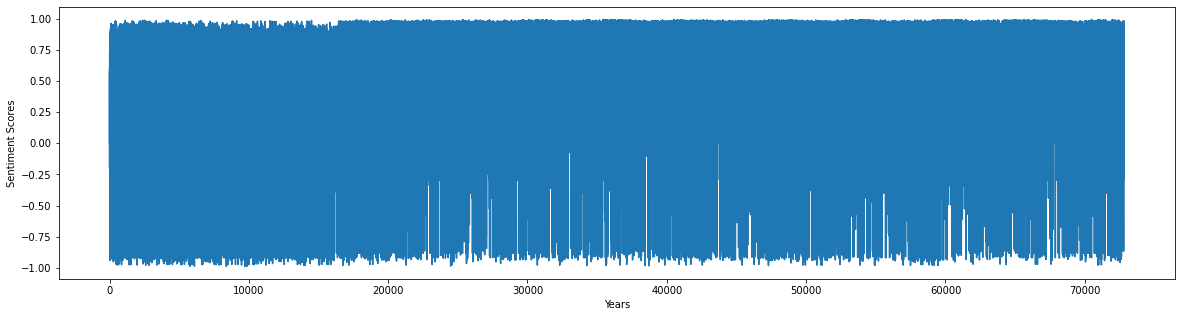

In [17]:

plt.figure(figsize=(20, 5))
plt.plot(tweets_senti['score'])
plt.xlabel('Years')
plt.ylabel('Sentiment Scores')

In [18]:
# GROUPBY THE DATE AND CONCATINATE TWEET TEXT
tweets_df['senti'] = tweets_df.groupby('date')['score'].transform(np.mean)
tweets_df

KeyError: 'Column not found: score'

In [ ]:
tweets_senti[tweets_senti['sentiment']==-1].count()

In [ ]:
res1 = pd.merge(stocks_df, tweets_senti, on='date', how='outer')

res1 = res1.dropna(subset=['prices'])
# res1 = res1.dropna(subset=['text'])

res1


In [ ]:
res1

In [ ]:
res1[res1['sentiment']==-1].count()

In [ ]:
plt.figure()
plt.plot(res1['date'], res1['prices'])

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200000,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

print("Word Cloud for Positive Tweets")
show_wordcloud(res1[res1['sentiment'] == 1].values)
print("\nWord Cloud for Negative Tweets")
show_wordcloud(res1[res1['sentiment'] == -1].values)

In [ ]:

plt.figure(figsize=(20, 5))
plt.plot(res1['date'], res1['score'])
plt.xlabel('Years')
plt.ylabel('Sentiment Scores')

In [ ]:
res1.to_csv('data_with_senti.csv')

In [ ]:
# res = pd.merge(stocks_df, tweets_df, on='date', how='outer')

# res = res.dropna(subset=['prices'])
# res = res.dropna(subset=['text'])


# print(res.count())
# res.head()

In [ ]:
# senti = res.apply(lambda row: sentiment_scores(row['text']), axis=1)
# senti = pd.DataFrame({'sentiment' : senti})
# senti
# df_s = pd.merge(res, senti, left_index=True, right_index=True)
# df_s.info()

In [ ]:
# df_s[df_s['sentiment']==-1].count()

In [ ]:
# tweets_senti = tweets_senti[['date', 'score']]

# # tweets_df = tweets_df.groupby('date')['text'].apply(' '.join).reset_index()
# tweets_senti

In [ ]:
# tweets_senti = tweets_senti.groupby('date')['score'].apply(np.mean).reset_index()
# tweets_senti

In [ ]:
# def roun(row):
#     return round(row['score'], 3)

In [ ]:
# # tweets_senti['score'] = tweets_senti.apply(roun, axis=1)
# tweets_senti['score'] = tweets_senti.apply(lambda row: roun(row), axis=1)

# tweets_senti


In [ ]:
# df_s[df_s['sentiment']==-1].count()

In [ ]:
# load_dotenv('./.env')
# bearer_token = os.environ.get('AUTH_TOKEN')
# client = tweepy.Client(bearer_token=bearer_token)

In [ ]:
# # bearer_token = 'AAAAAAAAAAAAAAAAAAAAAImEXQEAAAAAzpNyPIgZMrb8CVXRh%2FkK62Q15Co%3DpTVWTJ2wa913NzVXwBuOGUxXoWfvQiNIlEeChftC2jXvTlgPvh'
# 'AAAAAAAAAAAAAAAAAAAAAImEXQEAAAAAzpNyPIgZMrb8CVXRh%2FkK62Q15Co%3DpTVWTJ2wa913NzVXwBuOGUxXoWfvQiNIlEeChftC2jXvTlgPvh'


# start_time = '2019-11-24T00:00:00Z'
# end_time = '2019-12-24T00:00:00Z'
# def url_creation(id, ntoken=None,init=False):
#   if init==True and not ntoken:
#     return client.get_users_tweets(id=id, tweet_fields=['created_at'],start_time=start_time, end_time=end_time, max_results=100)

#   return client.get_users_tweets(id=id, tweet_fields=['created_at'],start_time=start_time, end_time=end_time, max_results=100, pagination_token=ntoken)


# def get_data(ls):
#   ps = []
#   for i in ls:
#     p = decontracted(i['text'])
#     p = clean(p)
#     t = {'date':i['created_at'],'text':p}
#     if p != ' ':
#       ps.append(t)
#   return ps


In [ ]:
# users = [420943164, 81083096]
# id = '420943164'
# master_list = []

# initial_req = True
# ntoken = None
# while True:
#     tweets = url_creation(id, ntoken=ntoken, init=initial_req)
#     initial_req = False
#     # print(tweets.meta)
#     if 'next_token' not in tweets.meta:
#       ntoken = None
#       print('Exiting now...')
#       break
#     ntoken = tweets.meta['next_token']
#     print(ntoken)

#     ps = get_data(tweets.data)
#     master_list.append(ps)

# print(len(master_list))
# print([len(i) for i in master_list])


In [ ]:
# temp = []
# for i in master_list:
#     temp+=i
# master_list = temp

In [ ]:
# df_n = pd.DataFrame(master_list)
# df_n['date'] = pd.to_datetime(df_n['date'], format="%Y-%m-%d")
# df_n['date'] = df_n.apply(lambda row : str(row['date']).split()[0], axis=1)
# df_n

In [ ]:
# df_n = df_n.groupby('date')['text'].apply(' '.join).reset_index()
